Ik wil een PCA maken met de data set Movies.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import pandas as pd
from numpy import mean
movies=pd.read_csv("C:\\Users\\s144239\\Documents\\GitHub\\ProjectCPO\\pandas\\Movies.csv")
movies.head() # this shows the first 5 rows of the DataFrame


,title,year,lifetime_gross,ratingInteger,ratingCount,duration,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,...,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western,Unnamed: 37
0,METROPOLIS,1928,1236166,8,81007,9180,3,4,67,428,...,0,0,1,0,0,0,0,0,0,NaN
1,CITY LIGHTS,1931,19181,9,70057,5220,2,0,38,187,...,0,1,0,0,0,0,0,0,0,NaN
2,MODERN TIMES,1936,163577,9,90847,5220,3,1,44,27,...,0,0,0,0,0,0,0,0,0,NaN
3,GONE WITH THE WIND,1939,198676459,8,160414,14280,10,6,143,1263,...,0,1,0,0,0,0,0,1,0,NaN
4,THE WIZARD OF OZ,1939,22342633,8,209506,6120,6,12,126,2363,...,0,0,0,0,0,0,0,0,0,NaN


In [5]:
name1='nrOfWins'
name2='nrOfNominations'
row1=movies[name1]
row2=movies[name2]

newtab=pd.DataFrame({name1:row1,name2:row2})
newtab.head(5)

n=len(movies.columns)
m=movies.loc[:,movies.columns[2:n]]
print(m.head())

   lifetime_gross  ratingInteger  ratingCount  duration  nrOfWins  \
0         1236166              8        81007      9180         3   
1           19181              9        70057      5220         2   
2          163577              9        90847      5220         3   
3       198676459              8       160414     14280        10   
4        22342633              8       209506      6120         6   

   nrOfNominations  nrOfPhotos  nrOfNewsArticles  nrOfUserReviews  nrOfGenre  \
0                4          67               428              376          2   
1                0          38               187              186          3   
2                1          44                27              180          2   
3                6         143              1263              653          3   
4               12         126              2363              477          3   

      ...       RealityTV  Romance  SciFi  Short  Sport  TalkShow  Thriller  \
0     ...               0

In [405]:
B = np.array([row1, row2])
print('This is matrix B.')
print(B) 
#B[0].max()

This is matrix B.
[[3 2 3 ..., 0 0 1]
 [4 0 1 ..., 0 0 3]]


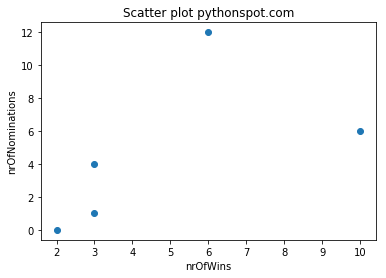

In [406]:
import matplotlib.pyplot as plt
plt.scatter(row1[:5],row2[:5])
plt.title('Scatter plot pythonspot.com')
plt.xlabel(name1)
plt.ylabel(name2)
plt.show()

In [407]:
from numpy import mean

M = mean(B, axis=1)


6770.99706667


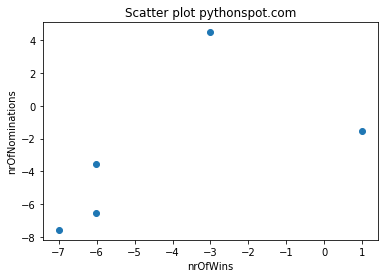

In [408]:
C =B.transpose() - M
C=C.transpose()
print(C[0].max())

plt.scatter(C[0][:5],C[1][:5])
plt.title('Scatter plot pythonspot.com')
plt.xlabel(name1)
plt.ylabel(name2)
plt.show()

In [409]:
from numpy import cov
V = cov(C)
V

array([[ 24389.93143978,    103.76260059],
       [   103.76260059,    173.47864134]])

In [410]:
eigenvalues, eigenvectors = la.eig(V)
print(eigenvalues)
print(eigenvectors)

[ 24390.37603337    173.03404776]
[[ 0.99999082 -0.00428468]
 [ 0.00428468  0.99999082]]


In [411]:
totalevariance=np.trace(V)
componentmatrix=eigenvalues/totalevariance
print(componentmatrix)
cum_var_exp = np.cumsum(componentmatrix)
cum_var_exp

[ 0.99295562  0.00704438]


array([ 0.99295562,  1.        ])

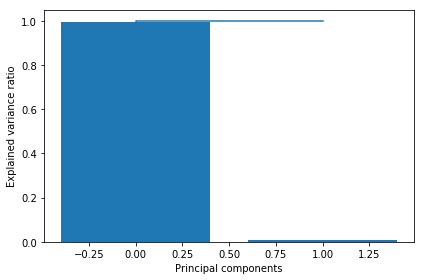

In [412]:
plt.bar(range(2),componentmatrix)
plt.step(range(2),cum_var_exp)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.show()

In [413]:
eigenv=eigenvectors[0]
matrix_w=np.hstack(eigenv.reshape(1,2))
matrix_w

array([ 0.99999082, -0.00428468])

(3750,)
range(0, 3750)


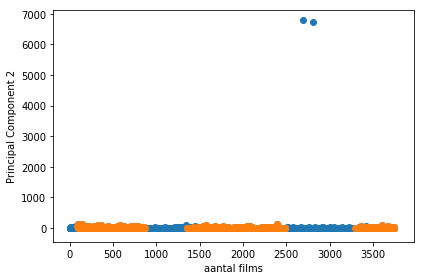

In [469]:
Y = B.transpose().dot(matrix_w)
print(Y.shape)
len(Y)

p=[]
name3='year'
row3=movies[name3]
#print(row3[:6])

x = range(len(row3))
print(x)
for i in x:
    if row3[i]>'2000':
        p.append(i)
y=row1[p]
plt.scatter(range(3750),Y)
plt.scatter(p,y)
plt.xlabel('aantal films')
plt.ylabel('Principal Component 2')
#plt.legend(loc='right')
plt.tight_layout()
plt.show()

(3750,)
range(0, 3750)


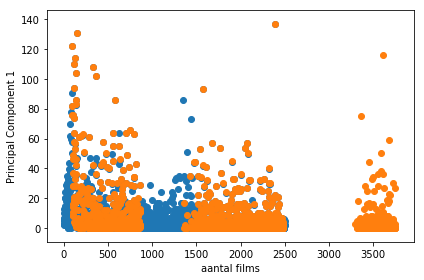

In [471]:
Y = B.transpose().dot(matrix_w)
print(Y.shape)
len(Y)

p=[]
name3='year'
row3=movies[name3]
#print(row3[:6])

x = range(len(row3))
print(x)
for i in x:
    if row3[i]>'2000':
        p.append(i)
y=row1[p]
plt.scatter(range(2500),Y[:2500])
plt.scatter(p,y)
plt.xlabel('aantal films')
plt.ylabel('Principal Component 1')
plt.tight_layout()
plt.show()

Conclusie
Er zijn twee waarden die rond de 7000 zijn en dat is niet goed, die zijn outliers. 
Daarom is de aantal fiml van 0 tot 2500 genomen.
De oranje punten zijn dat jaar talen boven 2000. 
de nrOfNominations en nrOfWins zijn positief gerelateerd, maar in de plot is niet achter te halen de verhouding van de twee. 
